In [16]:
#!pip install tenserflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.optimizers import Adam

In [3]:
df_dir=r'C:/Users/Mohammed Arif/Downloads/cats_dogs'
df_dir

'C:/Users/Mohammed Arif/Downloads/cats_dogs'

In [34]:
img_width,img_height=512,512
batch_size=7
epochs=40

In [36]:
datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [38]:
train_generator=datagen.flow_from_directory(
    df_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

Found 92 images belonging to 2 classes.


In [40]:
images,labels=next(train_generator)
print(images.shape)

(7, 512, 512, 3)


In [42]:
validation_generator=datagen.flow_from_directory(
    df_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 22 images belonging to 2 classes.


In [44]:
print(images.shape)

(7, 512, 512, 3)


In [46]:
model=Sequential()

In [48]:
model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    29,491,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,879,873 (113.98 MB)

 Trainable params: 29,879,873 (113.98 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=epochs
)


Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.4083 - loss: 3.1028 - val_accuracy: 0.4286 - val_loss: 0.7065
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5714 - loss: 0.6922 - val_accuracy: 1.0000 - val_loss: 0.5244
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.5024 - loss: 0.7071 - val_accuracy: 0.5714 - val_loss: 0.6813
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4286 - loss: 0.7091 - val_accuracy: 0.0000e+00 - val_loss: 0.8033
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.6177 - loss: 0.6769 - val_accuracy: 0.5238 - val_loss: 0.6923
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 0.7015 - val_accuracy: 1.0000 - val_loss: 0.6863
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.5367 - loss: 0.6937 - val_accuracy: 0.4286 - val_loss: 0.7133
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4286 - loss: 0.6899 - val_accuracy: 1.0000

In [52]:
#loss,accuracy=model.evaluate(validation_generator)
#print(accuracy,loss)


In [54]:
def predict_image(filename):
    img=load_img(filename,target_size=(512,512))
    plt.imshow(img)
    plt.show()
    img_array=img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    
    prediction=model.predict(img_array)
    predicted_probability=prediction[0,0]
    class_idx=int(prediction>0.5)
    
    if class_idx==1:
        print('dog')
    else:
        print('cat')


In [56]:
print("Classes indicies:",train_generator.class_indices)

Classes indicies: {'cats': 0, 'dogs': 1}


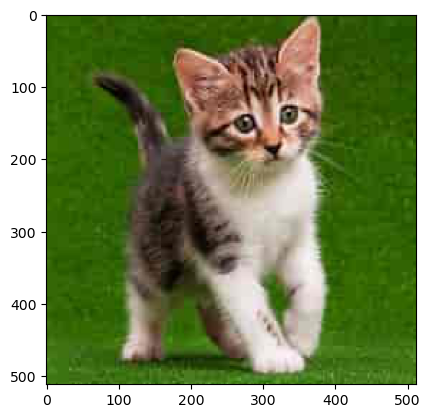

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
cat


C:\Users\Mohammed Arif\AppData\Local\Temp\ipykernel_3788\2374589526.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_idx=int(prediction>0.5)


In [58]:
predict_image(r'C:\Users\Mohammed Arif\Downloads\cats_dogs\cats\image35.jpeg')